# Анализ проекта

### Сбор данных из всех каталогов в один DataFrame

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create an empty DataFrame to add read data from 'data.csv' files to it
df = pd.DataFrame()
# path relative path to data folder
path = r".\data"

# Walk all branches of the folder tree to search for files 'data.csv'
for root, dirs, files in os.walk(path):
    # check file name match 'data.csv'
    for name_fls in files:
        # if substring name_fls is not found, -1 is returned
        if not name_fls.find('data.csv') == -1 : 
            # collect the path
            path_csv = f'{root}\\{name_fls}'
            # read 'data.csv'
            data_csv = pd.read_csv(path_csv, usecols=[1, 2])
            lst = path_csv.split("\\")
            # add new columns from parsed path 'lst'
            data_csv['name'] = lst[-2]
            data_csv['date'] = pd.to_datetime(lst[-3])
            # collect all DataFrame
            df = pd.concat([df, data_csv])

### Пользователь который купил больше всего товаров

In [2]:
# calculate the maximum value
max_byu = df.groupby('name', as_index=False) \
            .agg({'quantity':'sum'})['quantity']\
            .max()
# compare with the maximum value          
name_max = df.groupby('name', as_index=False) \
             .agg({'quantity':'sum'}) \
             .rename(columns={'quantity':'total'})\
             .query('total == @max_byu')
# formation of a string with names
', '.join([str(i) for i in name_max['name'].sort_values()])

'Alexey_Smirnov, Petr_Smirnov'

### Топ-10 товаров по числу проданных единиц за всё время

In [3]:
product_top10 = df.groupby('product_id', as_index=False) \
                  .agg({'quantity':'sum'}) \
                  .sort_values('quantity', ascending=False) \
                  .head(10)
product_top10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


### Объем продаж по дням

In [4]:
df['day'] = df['date'].dt.strftime('%d-%a')
sales_day = df.groupby(['day'], as_index=False)\
                .agg({'quantity':'sum'})
sales_day

,day,quantity
0,03-Thu,60
1,04-Fri,113
2,05-Sat,61
3,06-Sun,15
4,07-Mon,94
5,08-Tue,68
6,09-Wed,69


### Пользователи которые совершили повторные покупки в разные дни

In [5]:
repeat_purchases = df.drop_duplicates(['name', 'product_id','date'])\
                     .groupby(['name', 'product_id'], as_index=False)\
                     .agg({'date':'count'})\
                     .query('date > 1')\
                     .rename(columns={'date':'amount'})

repeat_purchases

,name,product_id,amount
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


### Визуализация

Text(0.5, 1.0, 'Продажи по дням')

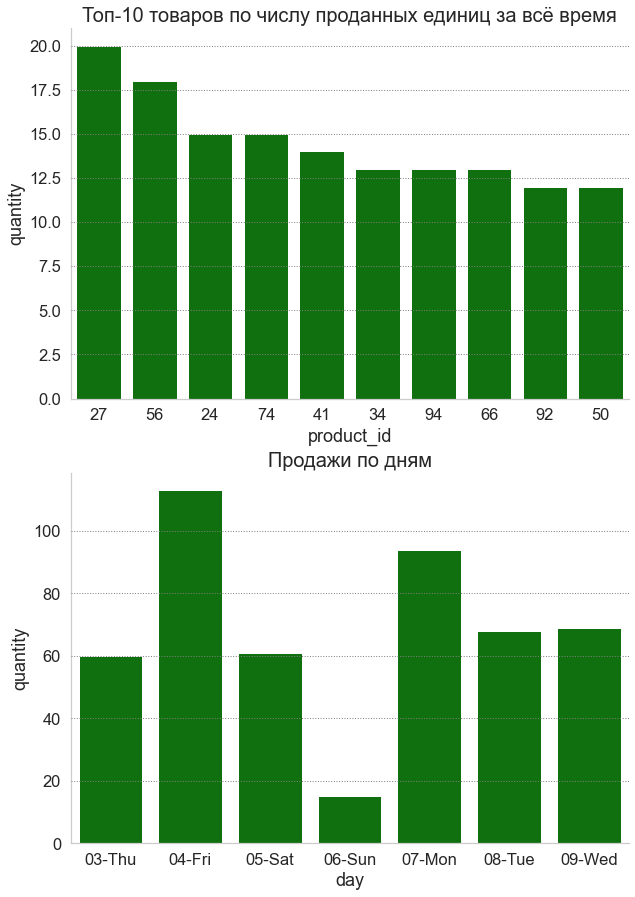

In [6]:
# creating a style for charts
sns.set_style("whitegrid",
              {'axes.grid':True,
               'grid.color':'grey',
               'grid.linestyle':':',
               'axes.axisbelow':False,
               'axes.spines.top':False,
               'axes.spines.right':False,
              })
sns.set_context("notebook", font_scale=1.5,
               rc={'axes.titlesize':20.0})
# construction barplot
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
top10 = sns.barplot(x='product_id',
                y='quantity',
                color='green',
                order=product_top10['product_id'],
                data=product_top10) 
top10.set_title("Топ-10 товаров по числу проданных единиц за всё время")

plt.subplot(2, 1, 2)
sales = sns.barplot(x='day',
                    y='quantity',
                    color='green',
                    data=sales_day)
sales.set_title("Продажи по дням")

### Выгрузка данных в excel

In [11]:
# writer 'df', 'name_max', 'product_top10', 'sales_day', 'repeat_purchases' to "output.xlsx"
with pd.ExcelWriter("output.xlsx") as writer:
    df.to_excel(writer, sheet_name="data", index=False)
    name_max.to_excel(writer, sheet_name="name_max", index=False)  
    product_top10.to_excel(writer, sheet_name="product_top10", index=False) 
    sales_day.to_excel(writer, sheet_name="sales_day", index=False)
    repeat_purchases.to_excel(writer, sheet_name="repeat_purchases", index=False)